In [12]:
import numpy as np
import pandas as pd

In [13]:
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [15]:
df.shape

(768, 9)

In [21]:
ones = df.loc[df['Outcome'] == 1]
zero = df.loc[df['Outcome'] == 0]

In [22]:
print(len(ones), len(zero))

268 500


In [24]:
import seaborn as sns

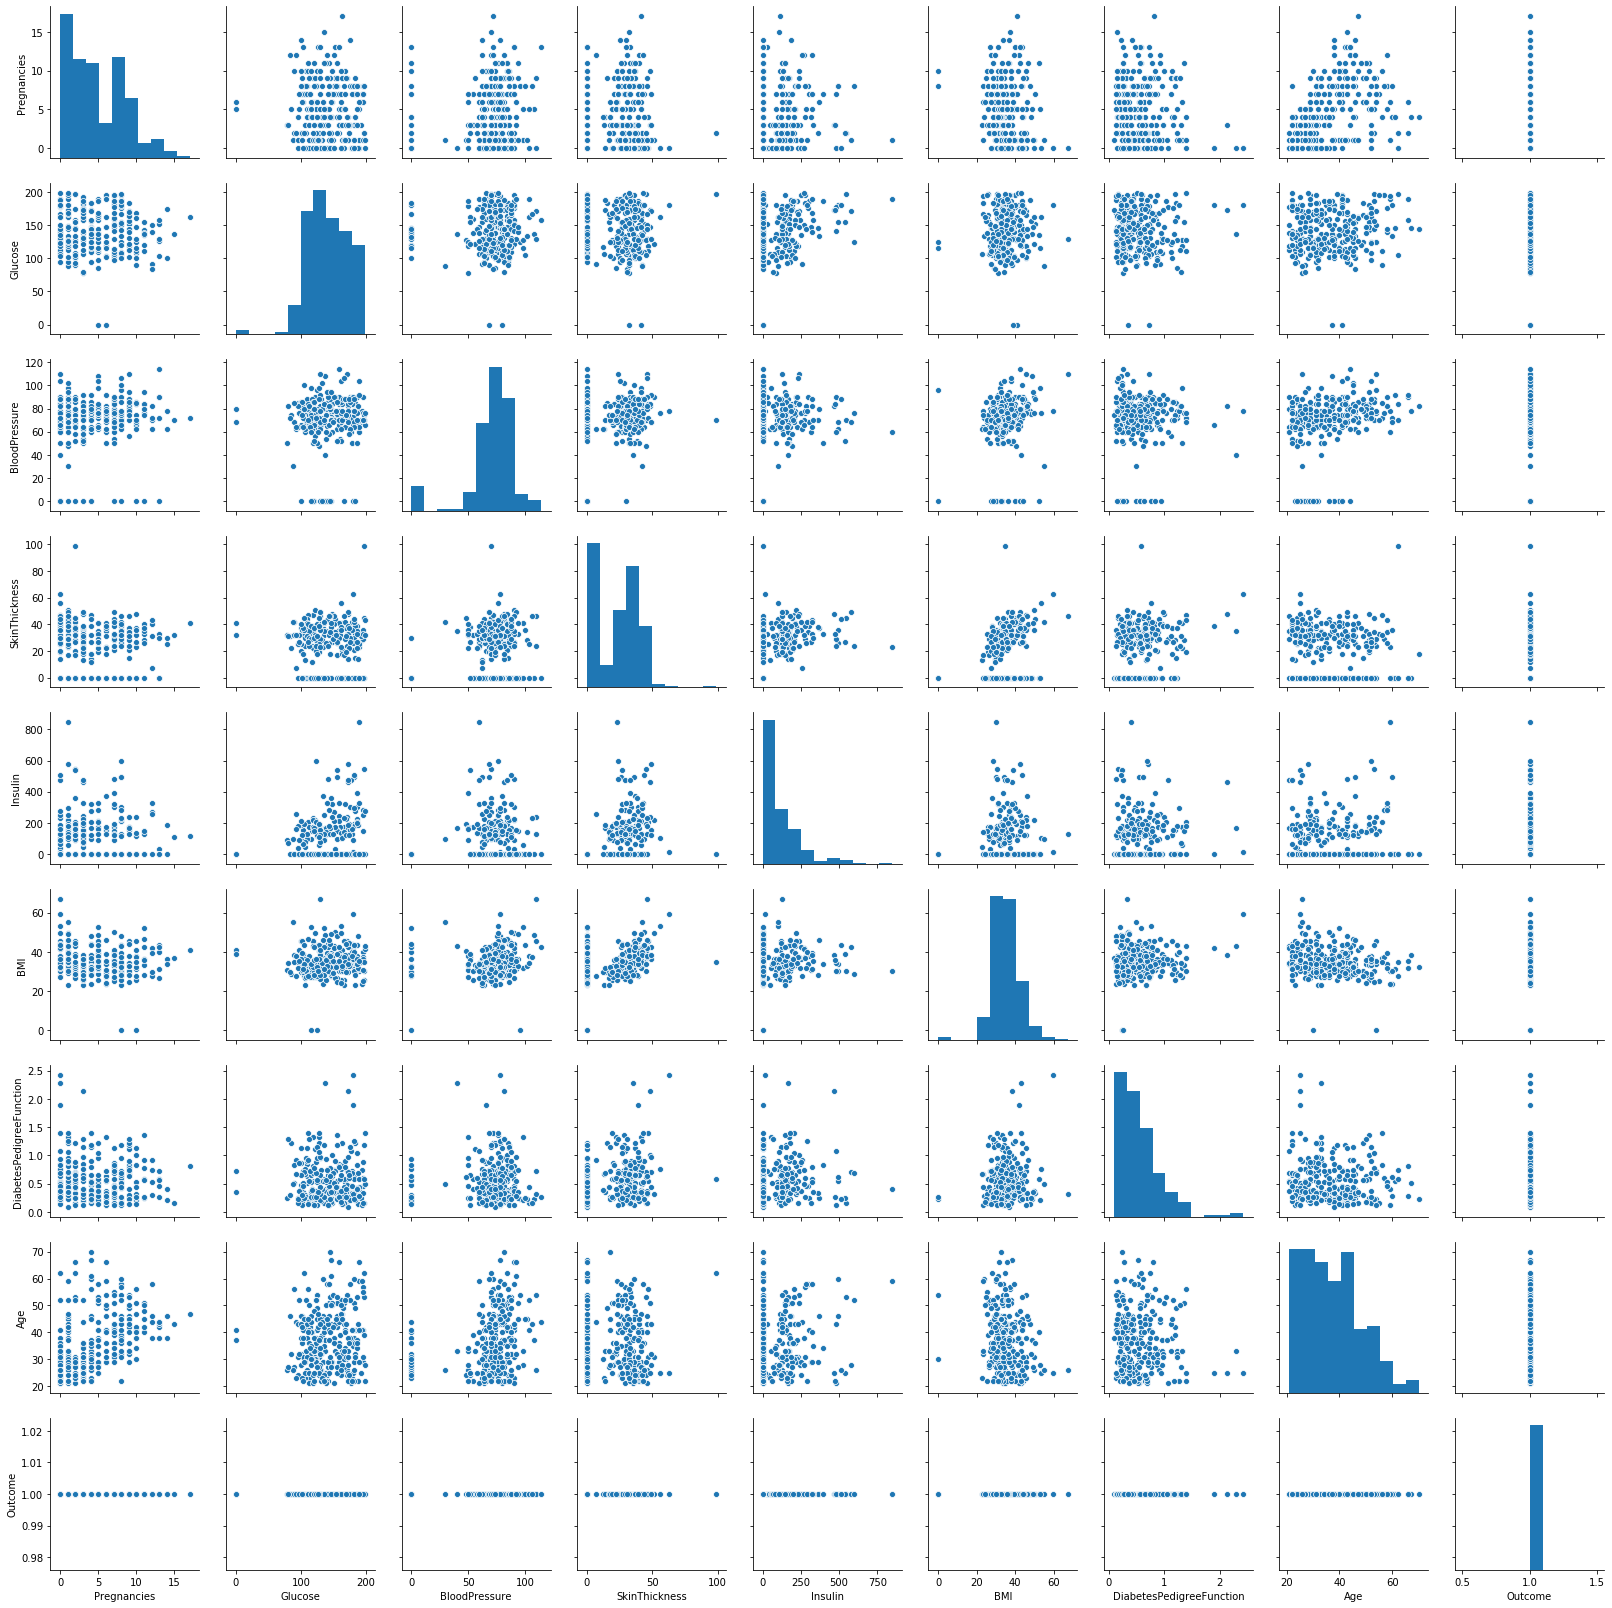

In [25]:
sns.pairplot(ones)

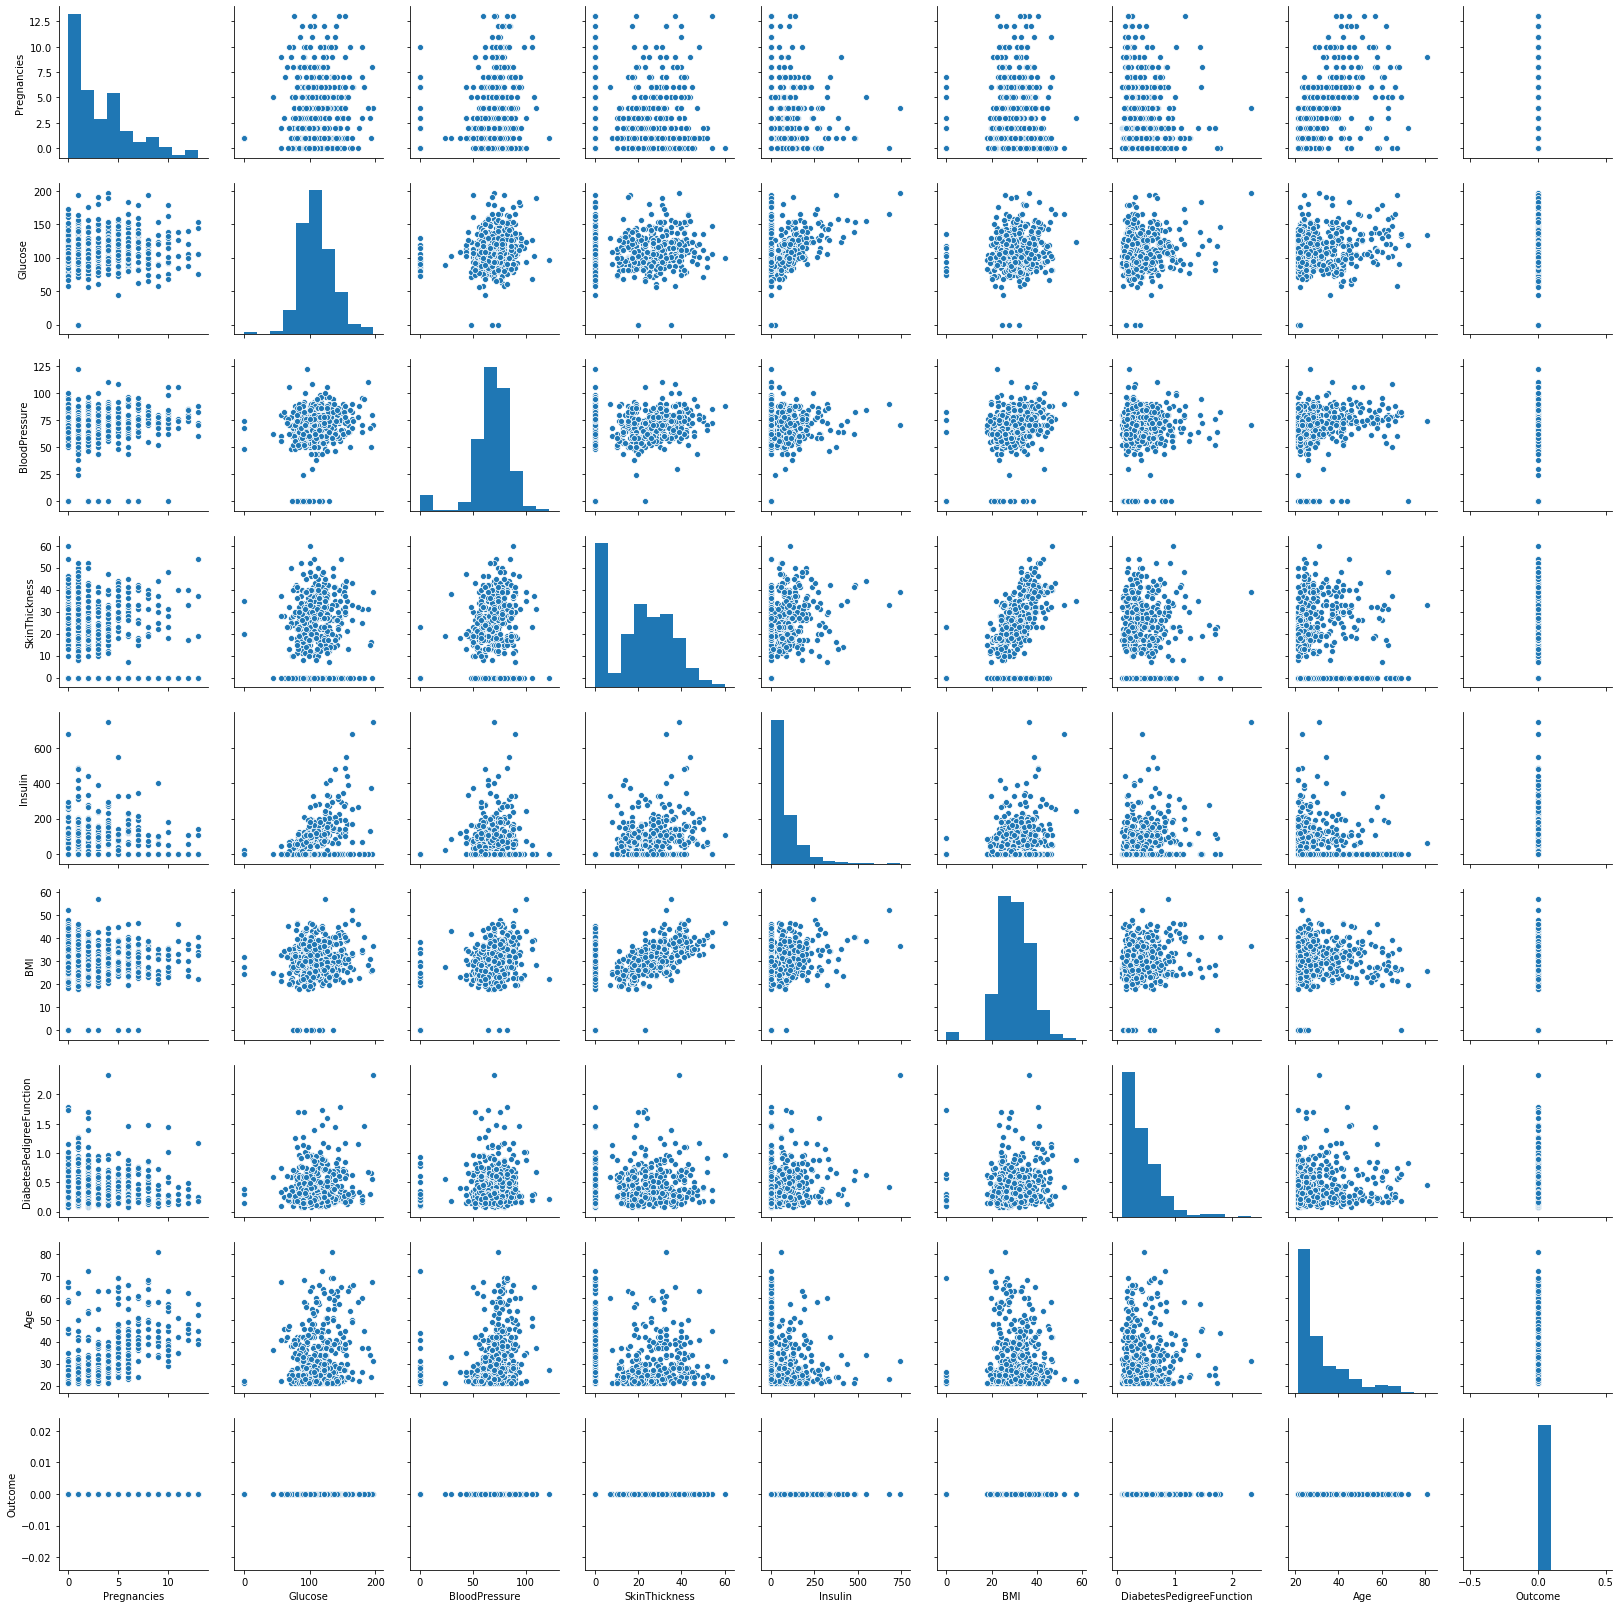

In [26]:
sns.pairplot(zero)

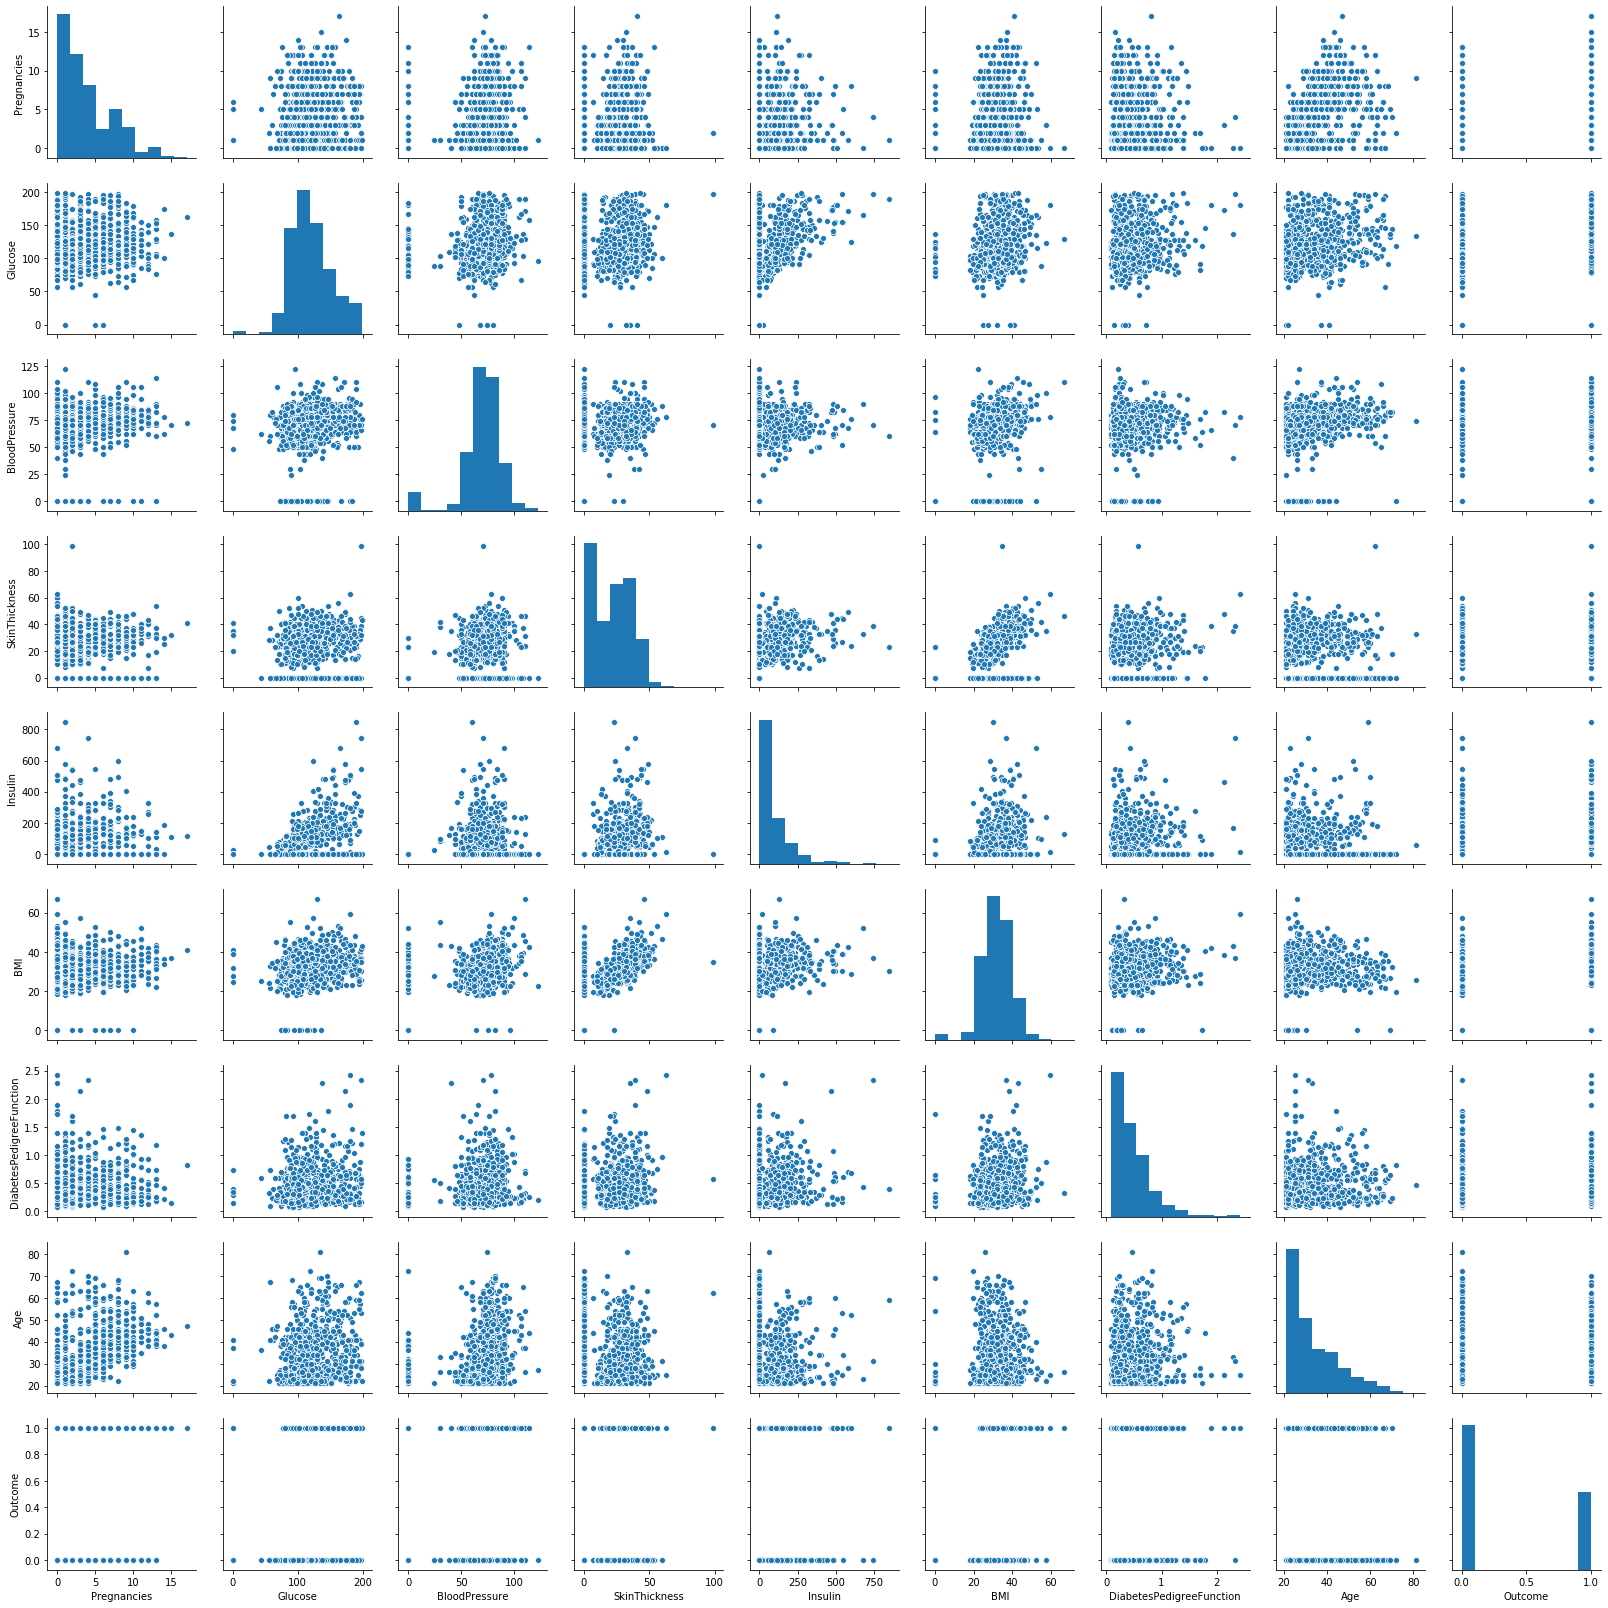

In [27]:
sns.pairplot(df)

In [30]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [47]:
model = Sequential()

model.add(Dense(units = 12, activation='relu', input_dim = 8))
model.add(Dense(units = 9, activation = 'relu'))
model.add(Dense(units = 4, activation='relu'))
model.add(Dropout(.25))
model.add(Dense(units = 1, activation = 'sigmoid'))
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 12)                108       
_________________________________________________________________
dense_15 (Dense)             (None, 9)                 117       
_________________________________________________________________
dense_16 (Dense)             (None, 4)                 40        
_________________________________________________________________
dropout_4 (Dropout)          (None, 4)                 0         
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 5         
Total params: 270
Trainable params: 270
Non-trainable params: 0
_________________________________________________________________


In [48]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [49]:
from sklearn.model_selection import train_test_split

In [50]:
y = df['Outcome']
X = df.drop(columns=['Outcome'])

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .33, random_state = 42)

In [52]:
model.fit(X_train, y_train, epochs=100, batch_size = 100)

Epoch 1/100
514/514 [==============================] - 0s 354us/step - loss: 7.6011 - accuracy: 0.5837
Epoch 2/100
514/514 [==============================] - 0s 24us/step - loss: 7.4593 - accuracy: 0.5661
Epoch 3/100
514/514 [==============================] - 0s 21us/step - loss: 6.6713 - accuracy: 0.5506
Epoch 4/100
514/514 [==============================] - 0s 27us/step - loss: 5.0963 - accuracy: 0.5720
Epoch 5/100
514/514 [==============================] - 0s 36us/step - loss: 4.6494 - accuracy: 0.5661
Epoch 6/100
514/514 [==============================] - 0s 36us/step - loss: 4.0882 - accuracy: 0.5311
Epoch 7/100
514/514 [==============================] - 0s 29us/step - loss: 3.1843 - accuracy: 0.6051
Epoch 8/100
514/514 [==============================] - 0s 32us/step - loss: 2.4000 - accuracy: 0.6089
Epoch 9/100
514/514 [==============================] - 0s 33us/step - loss: 2.2720 - accuracy: 0.5272
Epoch 10/100
514/514 [==============================] - 0s 25us/step - loss: 1.76

514/514 [==============================] - 0s 27us/step - loss: 0.6071 - accuracy: 0.6440
Epoch 81/100
514/514 [==============================] - 0s 27us/step - loss: 0.6130 - accuracy: 0.6479
Epoch 82/100
514/514 [==============================] - 0s 27us/step - loss: 0.6138 - accuracy: 0.6440
Epoch 83/100
514/514 [==============================] - 0s 27us/step - loss: 0.6156 - accuracy: 0.6459
Epoch 84/100
514/514 [==============================] - 0s 30us/step - loss: 0.6230 - accuracy: 0.6440
Epoch 85/100
514/514 [==============================] - 0s 29us/step - loss: 0.6233 - accuracy: 0.6459
Epoch 86/100
514/514 [==============================] - 0s 31us/step - loss: 0.6183 - accuracy: 0.6479
Epoch 87/100
514/514 [==============================] - 0s 26us/step - loss: 0.6142 - accuracy: 0.6479
Epoch 88/100
514/514 [==============================] - 0s 26us/step - loss: 0.6302 - accuracy: 0.6479
Epoch 89/100
514/514 [==============================] - 0s 25us/step - loss: 0.6107 - 

In [53]:
accuracy = model.evaluate(X_test, y_test, verbose=0)
accuracy

[0.6078575661801916, 0.6771653294563293]